# 1 Configuring Kaggle

In [13]:
from google.colab import drive
import os
import random
import shutil
import glob

In [3]:
drive.mount("./drive")

Mounted at ./drive


In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "./drive/MyDrive/Kaggle"

In [48]:
!rm -fr "./data"

In [49]:
!kaggle datasets download -d ashwingupta3012/human-faces --unzip

100% 1.81G/1.82G [00:11<00:00, 59.9MB/s]
100% 1.82G/1.82G [00:11<00:00, 169MB/s] 


In [50]:
os.mkdir("./data")

In [51]:
!mv Humans ./data/faces

### 1.1 Organizing data

In [ ]:
folder = "./data/faces"
count = 1

for file_name in os.listdir(folder):
  source = f"{folder}/{file_name}"
  
  destination = f"{folder}/pic.{str(count)}.jpg"

  os.rename(source, destination)
  count += 1

os.listdir(folder)

In [53]:
len(os.listdir(folder))

7219

In [54]:
os.chdir("./data/faces")
if os.path.isdir("./train") is False:
  os.makedirs("./train/faces")
  os.makedirs("./valid/faces")
  os.makedirs("./test/faces")

  for i in random.sample(glob.glob("./pic*"), 3000):
    shutil.move(i, "./train/faces")

  for i in random.sample(glob.glob("./pic*"), 2110):
    shutil.move(i, "./valid/faces")

  for i in random.sample(glob.glob("./pic*"), 2109):
    shutil.move(i, "./test/faces")

os.chdir("../../")

# 2 Creating Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### 2.2 Preprocessing images

In [57]:
train_path = "./data/faces/train"
valid_path = "./data/faces/valid"
test_path = "./data/faces/test"

In [58]:
train_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=["faces"], batch_size=10
)

valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=["faces"], batch_size=10
)

test_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), classes=["faces"], batch_size=10
)

Found 3000 images belonging to 1 classes.
Found 2110 images belonging to 1 classes.
Found 2109 images belonging to 1 classes.


In [59]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [60]:
imgs, text_labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

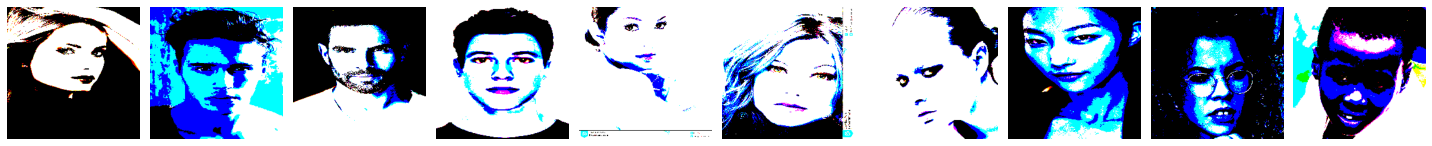

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [62]:
plotImages(imgs)
print(text_labels)